# Text Vectorisation and Similarity

The process of converting or transforming a data set into a set of vectors is called __Vectorization__.<br>
Here we explore several methods of text vectorisation.
- __word vectors__ - a relatively old approach of NLP, where the words of a sentence are processed without context, just lexically (NLP). These algorithms implement techniques, such as __Bag-Of-Words__ and __TF-IDF__ <br>
- modern algoriths that consider the meaning, the semantical role of the word in a sentence and simulate "undrstanding" the inforation in the document (NLU). These algiriths implement tokens, embedding, and deep learning ANN.

This notebook explains the approaches and several basic methods for their implementation.

Objectives: 
- understanding the basic concepts of text vectorisation 
- practicing implementation of vectorisation algorithms in Python programming

Tasks: 
1. Create a function for estimating the similarity between two vectors by means of _cosine similarity_ measure
2. Test the function by comparing variety of numeric test data
3. Test the function by comparing text data
3. Apply the function in a Q&A (questions answering) application

In [15]:
import numpy as np
import pandas as pd
import ctypes
import math
import pprint

In [16]:
import cosimfunc
from cosimfunc import cosim

In [17]:
import importlib 
importlib.reload(cosimfunc)

<module 'cosimfunc' from 'C:\\Users\\Alexander Michelsen\\Downloads\\cosimfunc.py'>

## Input 

First, we experiment with two text documents (sentences).

In [9]:
# enter two sentences
doc1 = "Mette Frederiksen is the prime minister of Denmark."
doc2 = "Denmark has female prime minister, who has the name Mette Frederiksen."

## Bag Of Words

A model, which represents the text as an unordered collection of words. It doesn't considedr the grammar features, nor the order of appearance of the words, but keeps information about multiplicity of the words (the frequency of appearance of each word in the text). <br>
Once we collect the words, we can code them in a numeric code, so to be able to apply a similarity function.

In [10]:
# parse the sentences in words
sent1 = doc1.split(" ")
sent2 = doc2.split(" ")

In [11]:
print(sent1)
print(sent2)

['Mette', 'Frederiksen', 'is', 'the', 'prime', 'minister', 'of', 'Denmark.']
['Denmark', 'has', 'female', 'prime', 'minister,', 'who', 'has', 'the', 'name', 'Mette', 'Frederiksen.']


### Corpus of Terms

In [12]:
# All words appearing in all documents
# union() removes duplications
corpus = set(sent1).union(set(sent2))
print(corpus)

{'female', 'minister,', 'Frederiksen', 'prime', 'who', 'Mette', 'name', 'Denmark.', 'Frederiksen.', 'Denmark', 'has', 'the', 'is', 'of', 'minister'}


In [13]:
# corpus size
n = len(corpus)
n

15

## Method 1: Binary Vectorisation

Take all words from the corpus and check which one appears in each of the sentences (we call a sentence 'document').
- For one sentence, write 1 for a word appears in that semntyence or 0 if it doesn't.
- Do this for each sentence separately.

Store the findings in a dictionary (key: value structure), one dict for each sentence.
- the __word__ is a key, the __appearance__ of it is a value - 1 (appears) or 0 (doesn't appear)
- at the start, each dictionary will contain empty positions - one per word in the corpus

In [ ]:
# Binary vector of word appearance in a sentence
def vect(sent):
    # create new dict and place zeros in it
    mydict = dict.fromkeys(corpus, 0) 
    
    # code each word's appearance in the sentence with 1
    for word in sent:
        mydict[word] = 1
    return mydict    

In [ ]:
# binarise sentence 1
dict1 = vect(sent1)
dict1

In [ ]:
# binarise sentence 1
dict2 = vect(sent2)
dict2

In [ ]:
# Store the binary data into a DataFrame
df = pd.DataFrame([dict1, dict2])
df

In [ ]:
# convert the dataframe into numpy array
ar = df.to_numpy() 

In [ ]:
# Apply function to test the similarity between the array rows
cosim(ar[0], ar[1])

__NB__: Notice the role of the fullstop at the end of the sentences!

## Method 2: Word Importance
We define some more features of the text, which could matter for the role of the words in it.

- __TF__ - term frequency -  how frequest is the occurrrence of a term (_word_) in a document (_sentence_)
- __DF__ - document frequency - number of documents containing this term
- __IDF__ - inverse term frequency - how big part of all documents contain this term
- __TF-IDF__ - an integrated measure for the importance of a term - multiply __TF x IDF__ to find it.

term = word

TF can be measured in different ways:
- absolute number of times the word appears in a document
- relative frequency - count of occurrences divided by the number (quantity) of the words in the document
- logarithmically scaled frequency (e.g. log(1 + count))

### 2.1 Count Vectorisation

Consider the _number of occurrencies_ of a word in a document (how many times the same word appears) - __raw count__. 

In [ ]:
# Create count vector from a sentence, telling the frequency of word appearance
# Call this function for each sentence
def cvect(sent):
    
    # creates the dict with the corpus words as keys and 0 as values
    mydict = dict.fromkeys(corpus, 0) 

    # count the occurrence of each word
    for word in sent:
        mydict[word] += 1
    return mydict    

In [ ]:
dict1 = cvect(sent1)
dict1

In [ ]:
dict2 = cvect(sent2)
dict2

In [ ]:
# collect the dictionaires in a data frame
dfc = pd.DataFrame([dict1, dict2])
dfc

Re-calculate the similarity

In [ ]:
# Store the binary values into array
arc = dfc.to_numpy()
arc

In [ ]:
# Apply function to test the similarity between the array rows
cosim(arc[0], arc[1])

### 2.2  Term Frequency
Relative TF
$$tf(t,d)={count-of-t-in-d \over number-of-words-in-d} $$

In [ ]:
# Recalculate the word appearance as a proportion of all words in the document
def computeTF(mydict, n):
    # New empty dict for the results of recalculation
    tfDict = {}
    
    for word, wcount in mydict.items():
        # calculate the proportion
        tfDict[word] = wcount/float(n) 
    return(tfDict)

In [ ]:
# call the function for both sets
tf1 = computeTF(dict1, len(sent1))
tf2 = computeTF(dict2, len(sent2))

In [ ]:
# store the two vectors into dataframe
tff = pd.DataFrame([tf1, tf2])
tff

TF doen't mean much. 10 times higher frequency doesn't mean 10 times more important term.

In [ ]:
# recompute similarity

In [ ]:
# Store the binary values into array
art = tff.to_numpy()

In [ ]:
# Test the similarity
cosim(art[0], art[1])

### 2.3 DF and IDF

If a word occurs many times in one document, but also in other documents, it may not be important, but just frequent.<br>
IDF determines how common a word is amongst the whole corpus.

In [ ]:
# IDF - inverse document frequency - measures the informativeness of term t
# DF - number of documents containing the term
# N - number of all documents
# D - corpus of all words
# idf(t, D) = N/df

def computeIDF(allDocs):
    # number of documents
    N = len(allDocs) 

    # create empty dict, put the words in as keys and 0 as value
    idf = {}
    idf = dict.fromkeys(allDocs[0].keys(), 0)    
    
    # check all docs 
    for doc in allDocs:
        # check all words 
        for word, wcount in doc.items():
            # count the doc if the word appears in it
            if wcount > 0:
                idf[word] += 1
    
    # make correction in the counting to avoid eventual division by zero: idf(t) = log10(N/(df + 1))
    for word, wcount in idf.items():
        idf[word] = math.log10(N/(float(wcount)) + 1)
        
    return(idf)

In [ ]:
# test
idfs = computeIDF([dict1, dict2])

In [ ]:
pprint.pprint(idfs)

### 2.4 TF-IDF
TF-IDF determines how relevant a term is in a given document

In [ ]:
# tf-idf(t, d) = tf(t, d) * idf(t, D)
def computeTFIDF(tf, idfs):
    tfidf = {}
    for word, wcount in tf.items():
        tfidf[word] = wcount*idfs[word]
    return(tfidf)


In [ ]:
#running our two sentences through the IDF:
idf1 = computeTFIDF(tf1, idfs)
idf2 = computeTFIDF(tf2, idfs)


In [ ]:
# store in a dataframe
idf= pd.DataFrame([idf1, idf2])
idf

In [ ]:
# Store the binary values into array
arx = idf.to_numpy()

In [ ]:
# Test the similarity
cosim(arx[0], arx[1])

BOW has many negatives
- for example, it counts equaly "John is older than Mary" and "Mary is older than John".

### 2.5 Using sklearn

_sklearn.feature_extraction.text.TfidfVectorizer(input)_

Parameters:

- input: It refers to parameter document passed, it can be a filename, file or content itself.

Attributes:
- vocabulary_: It returns a dictionary of terms as keys and values as feature indices.
- idf_: It returns the inverse document frequency vector of the document passed as a parameter.

Returns:
- fit_transform(): It returns an array of terms along with tf-idf values.
- get_feature_names(): It returns a list of feature names.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
result = tfidf.fit_transform([doc1, doc2])

In [ ]:
# get idf values
for e1, e2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(e1, '\t:', e2)

In [ ]:
# tf-idf values (doc, word)
print(result)

In [ ]:
cosine_similarity(result[0], result[1])

## Method 3: Applying NLP Techniques

### 3.1 Sentence Transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

In [ ]:
# Create embeddings from texts
corpus_embeddings = embedder.encode([doc1, doc2])
corpus_embeddings

In [ ]:
# Ask a question
# query = ["Cphbusiness afdelinger?"]
query = ["Who is Mette Frederiksen?"]

In [ ]:
# Vectorise the question
query_embedding = embedder.encode(query)
query_embedding

In [ ]:
# Test
# Search for similarities between the individual sentences and the question
for sent_embedding in corpus_embeddings:
    sim = util.cos_sim(query_embedding, sent_embedding)
    print(sim.tolist())

#### Another Example
_scipy.spatial.distance.cdist()_

In [ ]:
documents = ["Cphbusiness er erhvervsakademi", "En mand spiser mad", "Cphbusiness afdelinger"]

In [ ]:
# see the similaarity matrix
query_embedding = embedder.encode(documents)
query_embedding

### 3.2 Spacy

In [ ]:
!pip install langdetect

In [ ]:
import langdetect
from langdetect import detect, detect_langs

In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python -m spacy validate

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
!python -m spacy download da_core_news_md

In [ ]:
from spacy.lang.en import English
from spacy.lang.da import Danish

In [ ]:
# langdetect library
import langdetect
from langdetect import DetectorFactory, detect, detect_langs

### 3.2.1 Language Detection

In [ ]:
# function to detect the language
def langDetect(text):    
    mylang = ''        # language
    mylangprob = 0.0   # probability 
    try:
        langs = langdetect.detect_langs(text)
        mylang, mylangprob = langs[0].lang, langs[0].prob 
        print('Detected language:', mylang, mylangprob)
        
        if mylang=='en':     
            # default = English()  # Include English language data    
            model = 'en_core_web_md'
            
        elif mylang=='da': # Danish
            # default = Danish()  # Include Danish language data 
            model = 'da_core_news_md'
        
    # another language?
    except langdetect.lang_detect_exception.LangDetectException:
        log.debug('Language not recognised')
        pass
    return model

In [ ]:
model = langDetect(doc1)

In [ ]:
model = langDetect(doc2)

### 3.2.2 Tokenizing and Vectorisation

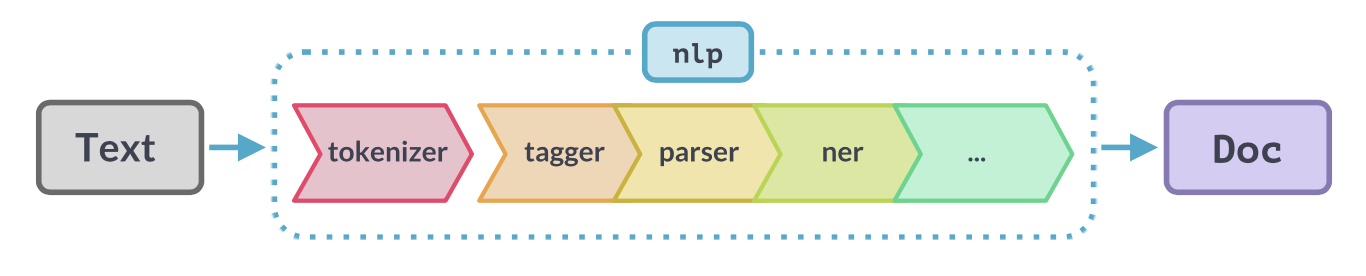

In [ ]:
# function to split the text into tokens (words) and discover their role in it
def tokenize(text, model):
        
    mytokens = []
    nlp = spacy.load(model)
    text = text.lower()
    doc = nlp(text)
    stopw = nlp.Defaults.stop_words
    # print(stopw)  # uncomment to see them
    
    print("\nPipeline:", nlp.pipe_names, "\n")    
    for token in doc:
        if not (token.is_stop or token.is_punct or token.is_space):
            data = {'token': token.text,
                    'lemma': token.lemma_, 
                    'POS': token.pos_, 
                    'tag': token.tag_, 
                    'ent_type': token.ent_type_,
                    'vector': token.has_vector,  # vectors come with the model
                    'oov': token.is_oov # out of vocabulary of the selected model
                   }
            print(data)
            # print('vector: ', token.vector)  # uncomment to see the vectors
            mytokens.append(token.text)
    clean_text = " ".join(mytokens)
    options = {"compact": True, "color": "blue"}
    spacy.displacy.render(doc, style="ent")
    spacy.displacy.render(doc, style="dep", options=options)
    return clean_text

In [ ]:
sent1 = tokenize(doc1, model)
sent1

In [ ]:
sent2 = tokenize(doc2, model)
sent2

In [ ]:
nlp = spacy.load(model)
doc_1 = nlp(sent1)

In [ ]:
doc_2 = nlp(sent2)

### 3.2.3 Vector Similarity
Similarity is determined by comparing word vectors or __word embeddings__, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec.<br> 
The __word2vec__ algorithm takes a text corpus as input and produces the word vectors as output. It first constructs a _vocabulary_ from the training text data and then learns vector representation of words. <br>
It is possible to compare whole documents, spans (sentences in aa document, as well as individual tokens.

In [ ]:
# use the vector similarity method
print(doc_1.similarity(doc_2))